In [42]:
#------------------------------------------------------------------#
#-- lOADING LIBRARIES AND IMPORTING NECESSARY MODULES AND MODELS --#
#------------------------------------------------------------------#

# data processing
import pandas as pd
import numpy as np
import graphviz
# Algorithms
from sklearn import tree
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# IMPORT DATA

In [43]:
titanic_df = pd.read_csv("/Users/saiffallah.GREENTNS/Desktop/Formation/AI/GOMYCODE/Dataset/titanic.csv",sep=',')

In [44]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Preprocessing

In [45]:
def preprocess_data(data):
    new_df = pd.DataFrame()
    
    new_df['Survived'] = data.Survived
    new_df['Age'] = data.Age.fillna(data.Age.mean())
    new_df['Sex'] = pd.Series([1 if s == 'male' else 0 for s in data.Sex],name = 'Sex')
    
    return new_df

In [46]:
df = preprocess_data(titanic_df)

In [47]:
df.head()

,Survived,Age,Sex
0,0,22.0,1
1,1,38.0,0
2,1,26.0,0
3,1,35.0,0
4,0,35.0,1


# Split dataset in features and target variable

In [48]:
# Split dataset in features and target variable
x = df.drop("Survived",axis=1)
y = df['Survived'].values
#
# Split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [49]:
X_train.head()

,Age,Sex
199,24.0,0
703,25.0,1
823,27.0,0
236,44.0,1
679,36.0,1


In [50]:
X_test.head()

,Age,Sex
417,18.000000,0
307,17.000000,0
87,29.699118,1
577,39.000000,0
684,60.000000,1


# Decision Tree Prediction

In [51]:
df_labels = df.Survived
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train,y_train)
predicted = classifier.predict(X_test)

In [52]:
print('Score: {}'.format(classifier.score(X_train,y_train)))

Score: 0.8328651685393258


# Decision Tree Vizualisation

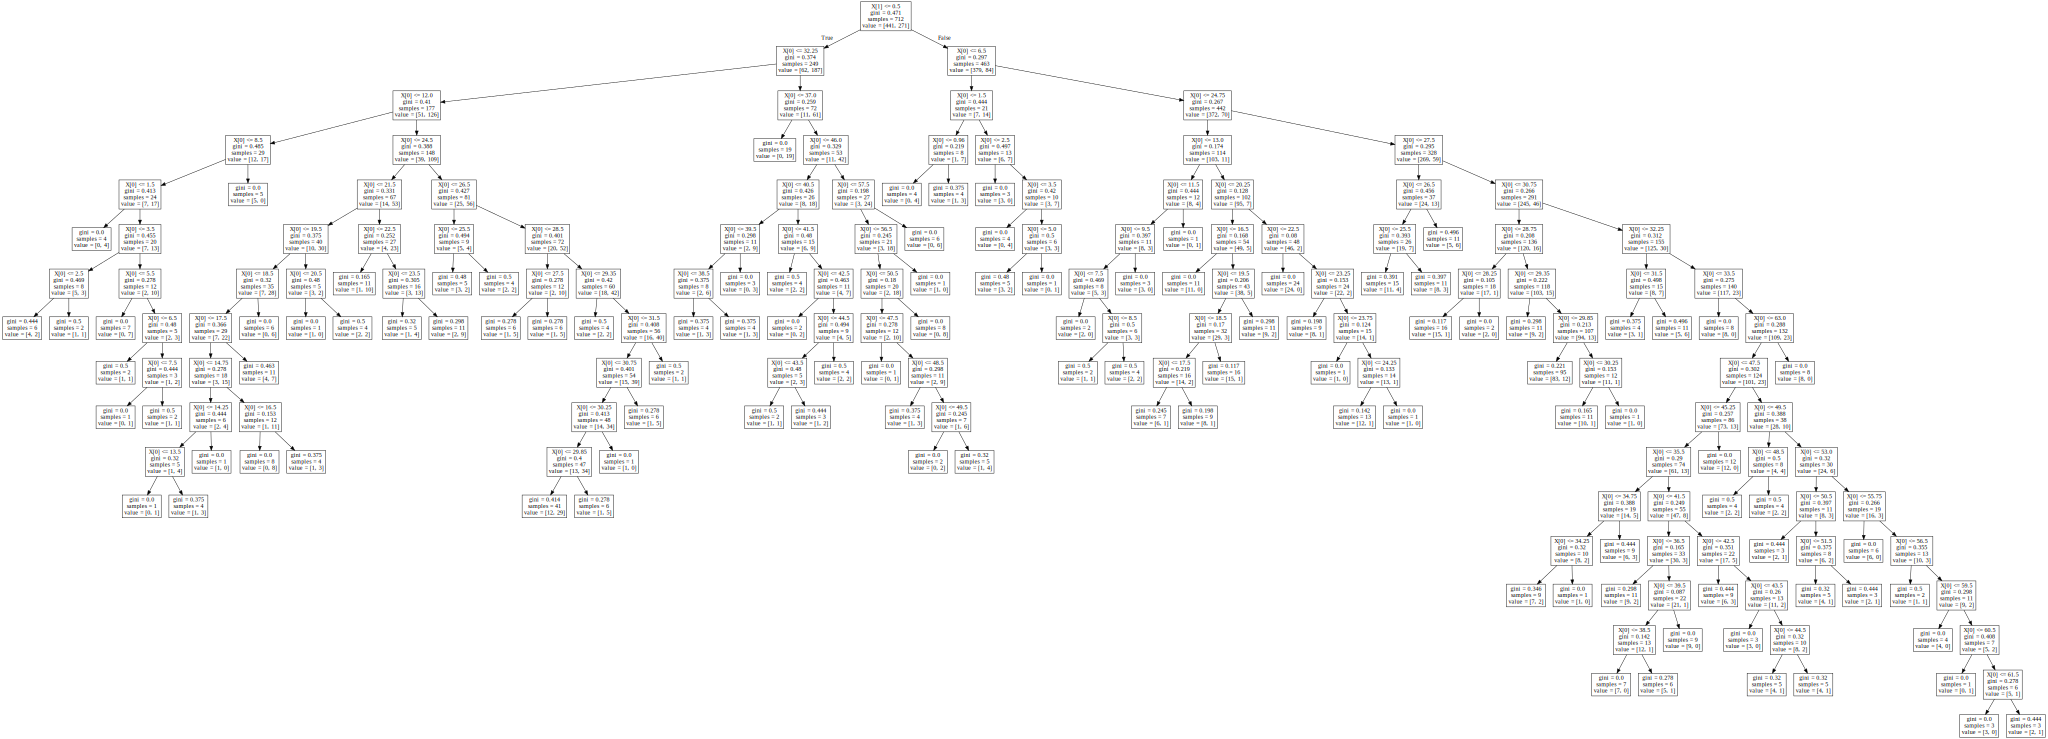

In [53]:
dot_data = tree.export_graphviz(
    classifier,
    out_file=None
)
graph = graphviz.Source(dot_data)
graph.render("data")
graph

# Change the decision tree parameters(change at least two parameters)

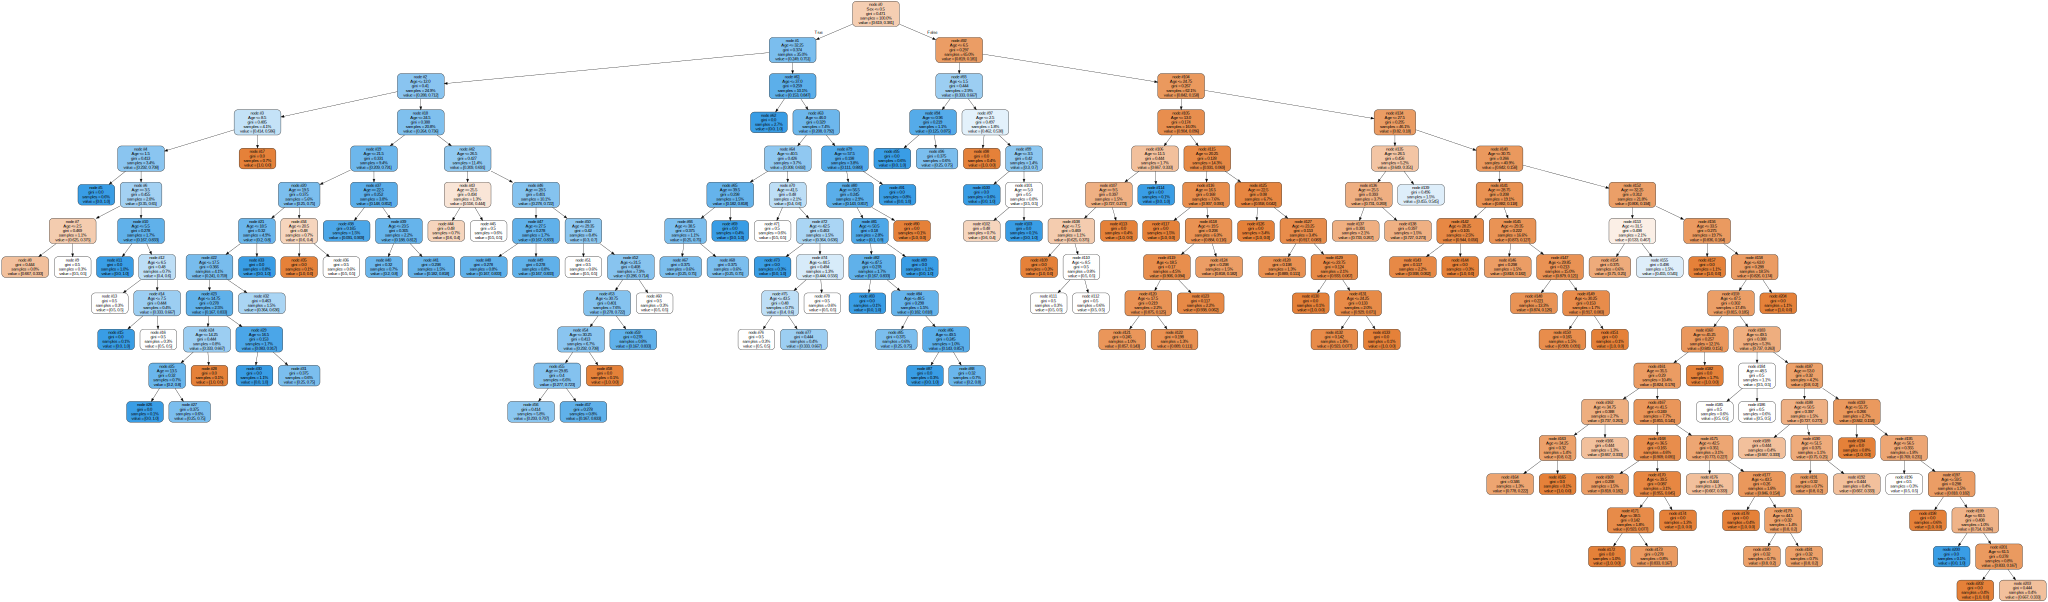

In [54]:
dot_data = tree.export_graphviz(
    classifier, 
    out_file=None,
    feature_names=X_train.columns,
    filled=True,
    node_ids=True,
    rounded=True,
    proportion=True
)
graph = graphviz.Source(dot_data)
graph.render("data")
graph

# Decision Tree Pruning Code

In [55]:
dtree = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10,
                                   min_samples_leaf = 5, max_depth = 5)

# Calculate the new accuracy

In [56]:
dtree.fit(X_train,y_train)
predicted = dtree.predict(X_test)

print('Score: {}'.format(dtree.score(X_train,y_train)))

Score: 0.7963483146067416


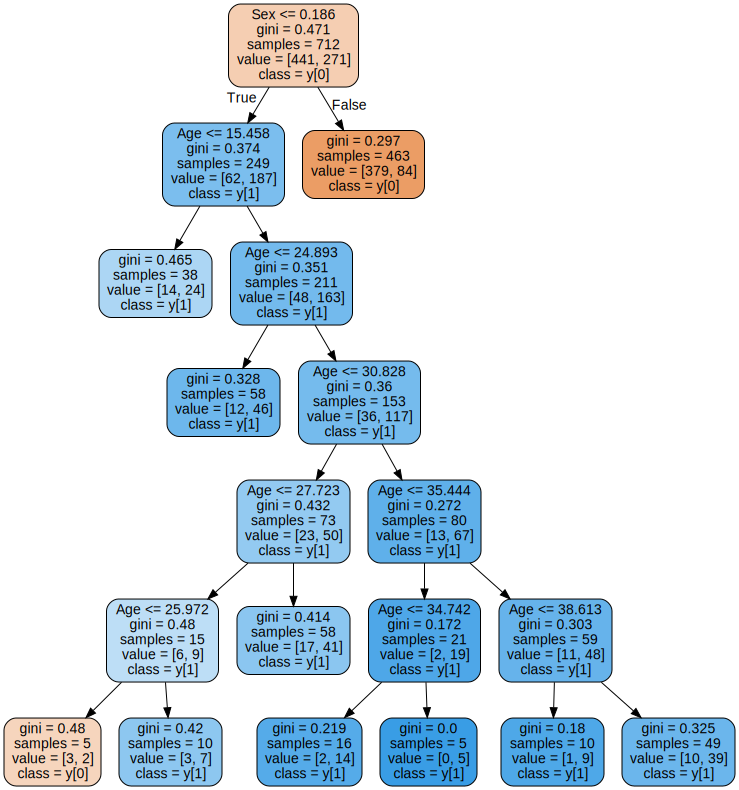

In [57]:
dot_data = tree.export_graphviz(
    dtree, 
    out_file=None,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    class_names = True)
graph = graphviz.Source(dot_data)
graph

# Use random forest with number of estimators = 100

In [58]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [59]:
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7318435754189944


# Use random forest with number of estimators = 50

In [60]:
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [61]:
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7318435754189944


# Use random forest with number of estimators = 20

In [62]:
clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [63]:
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7486033519553073
